In [1]:
using TSSM
using PyPlot
include("time_stepper.jl");

 *** OPENMP n_threads =           8


## Linear Schrödinger equation with time dependent potential

The *linear* Schrödinger equation
$$\mathrm{i}\frac{\partial}{\partial t}\psi(x,t)=\epsilon\Delta\psi(x,t)+\epsilon^{-1}V(x,t)\psi(x,t),
\quad \psi(x,0) = u_0(x)$$
with time dependent potential

We use a Fourier spectral method on the computational domain  $[x_\mathrm{min},x_\mathrm{max}]=[-1,1]$ with $n_x=2048$ discretization points:

In [2]:
nx = 2048
xmin = -1.0
xmax = +1.0

const x0=-0.3
const k0=0.1
const delta=1.22*10.0^(-4)
const eps=2.0^(-8)#1.0
roh(x) = exp(-1./(1-x.^2)).*(abs(x).<1.0)
u0(x) = (delta*pi)^(-1/4)*exp(1im*k0*(x-x0)/delta-(x-x0).^2/(2*delta))
V0(x) = roh(4*x).*sin(20*pi*x)
VE(x,t)=V0(x)+roh(3*t-1)*roh(sin(2*pi*(x-t)))

VE (generic function with 1 method)

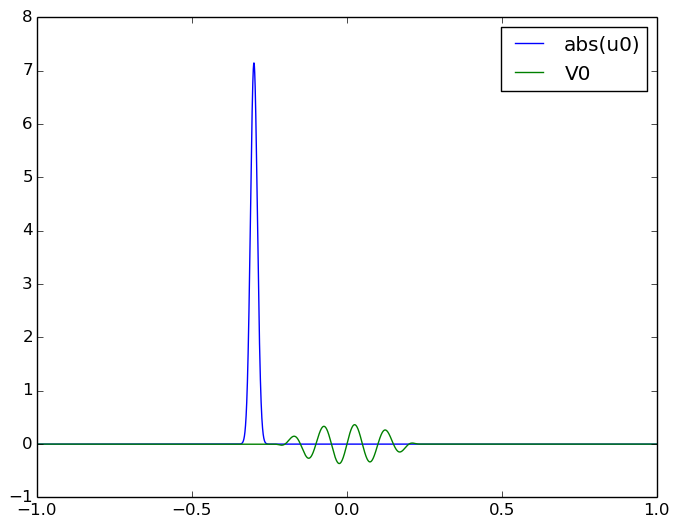

In [3]:
figure(2)
hold(false)
x=(collect(1:nx)/nx)*2-1.0
plot(x,abs(u0(x)),label="abs(u0)")
hold(true)
plot(x,V0(x),label="V0")
legend()
savefig("initial.png")

In [4]:
(delta*pi)^(-1/4)

7.146980121415895

In [5]:
include("schemes.jl");

 60.417779 seconds (409.41 k allocations: 99.624 GB, 2.51% gc time)
 73

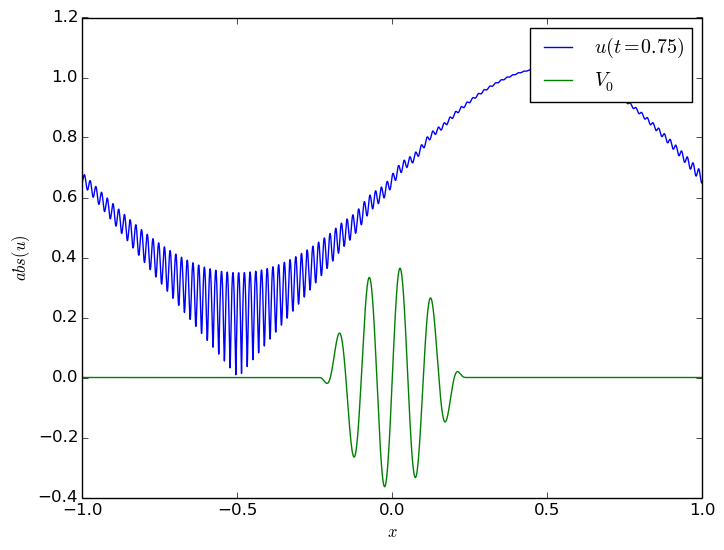

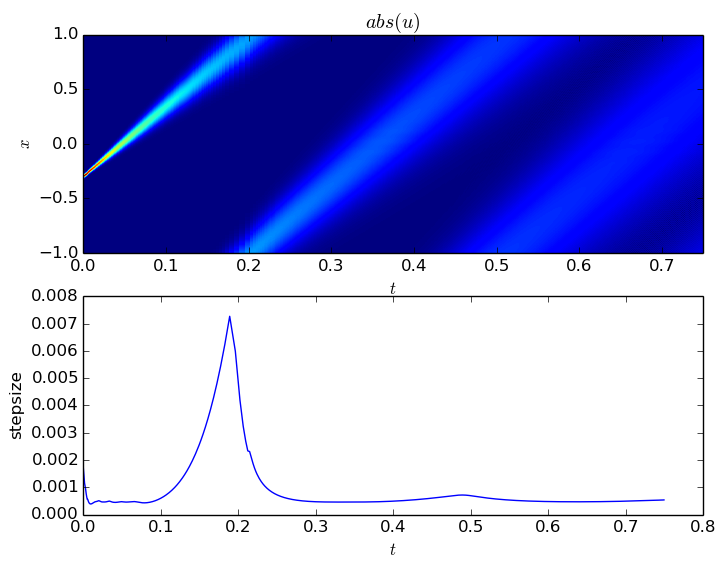

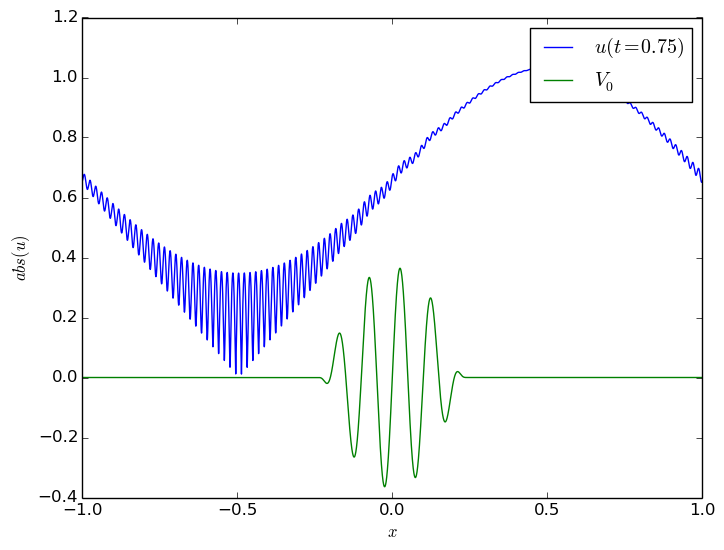

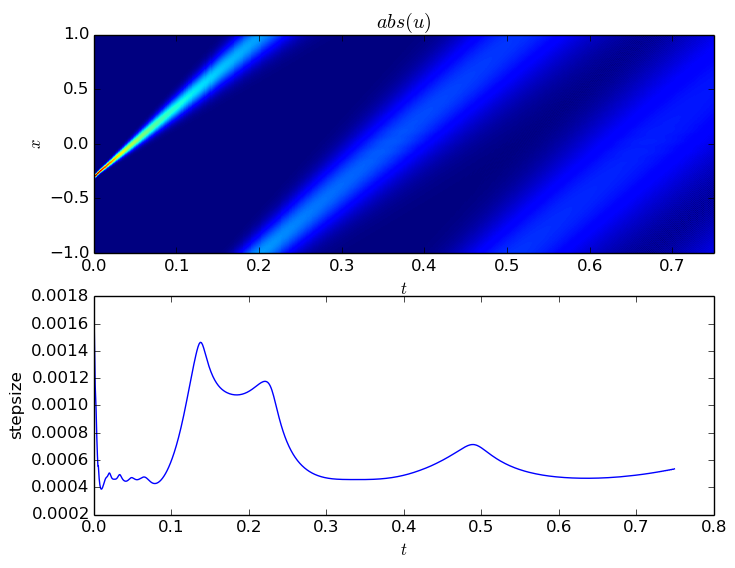

.987522 seconds (97.35 k allocations: 107.561 GB, 2.15% gc time)


In [6]:
method1 = Schroedinger1D(nx, xmin, xmax, potential=V0, hbar=eps, mass=0.5)
method2 = Schroedinger1D(nx, xmin, xmax, potential_t=VE,hbar=eps, mass=0.5)
methodes=[method1,method2]
me=0
for method in methodes
psi = wave_function(method)
set!(psi, u0)  # initial data

x = get_nodes(method);
to_real_space!(psi);
u = get_data(psi, true);

tend=0.75
t0=0.0
out=1
tol=1e-10

plotdata=abs(u)
steps=[0.0]
mytime=[0.0]
told=0.0
nsteps=0

    @time  for t in adaptive_time_stepper(psi, t0, tend, eps, tol, palindromic_scheme_56, "AB")
     #@printf("t=%20.18E \n",t)
      push!(steps,t-told)
      push!(mytime,t)
      told=t
      nsteps=nsteps+1
      if out==1
      to_real_space!(psi)
      plotdata = [plotdata abs(u)]
      end
  end
figure(1+me)
    hold(false)
    to_real_space!(psi)
    u = get_data(psi, true);
    plot(x,abs(u),label="\$u(t=0.75)\$")
    hold(true)
    plot(x,V0(x),label="\$V_0\$")
    xlabel("\$x\$")
    ylabel("\$abs(u)\$")
    legend()
    if(method==method1)
    savefig("t075_V0.png")
    else
         savefig("t075_V0_E.png")
    end
   

figure(2+me)
  hold(false)
  if out==1
  subplot(2, 1, 1)
  pcolormesh(mytime,x,plotdata)
  xlabel("\$t\$")
  ylabel("\$x\$")
  #colorbar()
  axis([t0,tend,xmin,xmax])
  title("\$abs(u)\$")

  subplot(2, 1, 2)
    #figure(3+me)
  end

  plot(mytime[1:end-2], steps[2:end-1])
  xlabel("\$t\$")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")
  me=me+3
end

In [17]:
2.0^(⁻11)


2.339002 seconds (43.39 k allocations: 2.826 GB, 4.52% gc time)


LoadError: LoadError: UndefVarError: ⁻11 not defined
while loading In[17], in expression starting on line 1